## Anasfasfasdfsd Introduction to Plots.jl NOT REALLY.

## Idea

Plots.jl is a non-traditional plotting library

- It does not implement a "plotting backend" itself, it's a plotting API
- The API is easily extendable via recipes

### Documentation

The rapidly growing documentation is at [https://juliaplots.github.io](https://juliaplots.github.io)


## Backends

Plots.jl uses other plotting libraries as backends

- PyPlot (matplotlib): Slow but dependable
- GR: Feature-rich and fast, but new
- Plotly/PlotlyJS: Interactive and good for web
- PGFPlots: Native LaTeX rendering
- UnicodePlots: Plots to unicode for no-display situations

## Using Backends

To switch backends, you simply use the name of the library: https://juliaplots.github.io/backends/


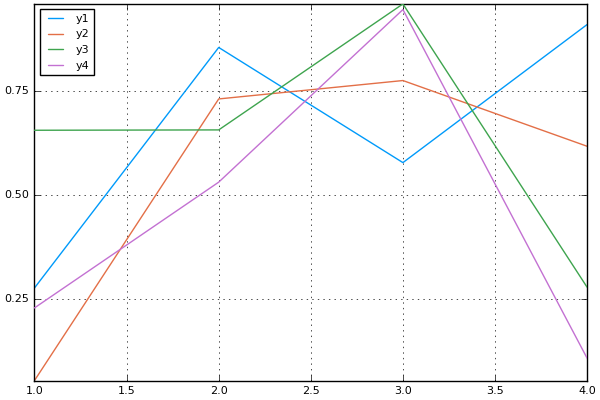

In [1]:
using Plots
pyplot() # Turns on the PyPlot backend
plot(rand(4,4))

In [2]:
gr()
plot(rand(4,4))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 4.0 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 
 
 
 
 
 
 
 y1 
 
 
 
 y2 
 
 
 
 y3 
 
 
 
 y4

In [3]:
plotlyjs()
plot(rand(4,4))

## Attributes

The attributes work with each of the backends: https://juliaplots.github.io/attributes/

Compatibility of attributes is found in this chart: https://juliaplots.github.io/supported/

I find it easiest to use this page to find the right attributes: https://juliaplots.github.io/examples/pyplot/


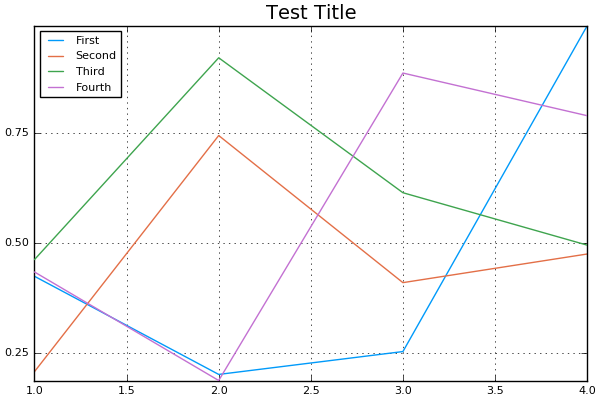

In [4]:
pyplot()
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

In [5]:
gr()
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 4.0 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 Test Title 
 
 
 
 
 
 
 
 
 
 First 
 
 
 
 Second 
 
 
 
 Third 
 
 
 
 Fourth

In [6]:
plotlyjs()
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

## Some Example useage

Let's try this out. Most of those examples come from [the examples section](https://juliaplots.github.io/examples/pyplot) of the plots website, so check it out for more.

In [7]:
# lesson 1: every column is a series
plot(rand(10))  # 1 col = 1 series

In [7]:
plot(rand(10,2))  # 2 cols = ...

In [9]:
# different linetypes
plot(rand(10,2),line=(:dot,:auto),marker=([:circle :diamond]),color=[:green :orange])

In [10]:
# histogram
histogram(randn(1000),nbins=20,legend=false,title="My Histogram!",ylabel="counts")

In [8]:
# add to an existing plot later:
plot(rand(100) / 3,reg=true,fill=(0,:red))

In [9]:
# ... with plot! or scatter!
scatter!(rand(100),marker=(2,:circle),color=:black)

## Subplots

* We often want to build subplots, ie multiple plots in one figure.
* Plots.jl has a convenient `layout` argument that you can specify.


In [13]:
plot(rand(100,4),layout = 4,legend=false)  # make 4 equal sized subplots


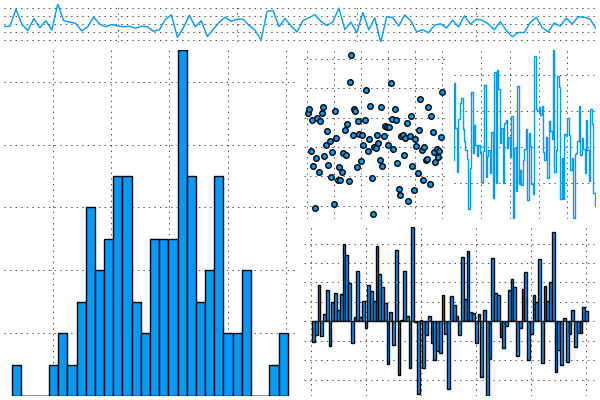

In [10]:
# specify the size of subplots
l = @layout([a{0.1h};b [c d; e]])
pyplot()
plot(randn(100,5),layout=l,t=[:line :histogram :scatter :steppre :bar],leg=false,ticks=nothing,border=false)


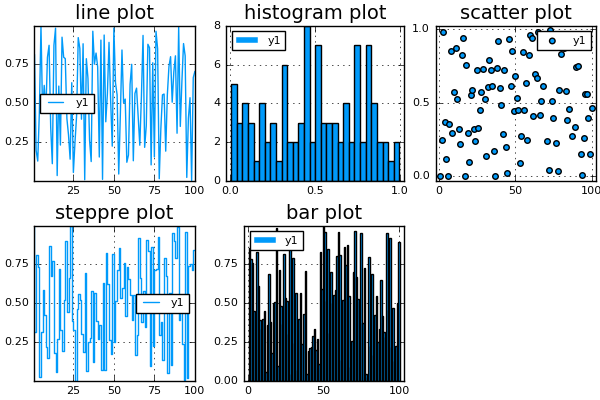

In [11]:
# we can also sequentially build plots and then stack them together
ty = [:line :histogram :scatter :steppre :bar]
p = Any[]
for typ in ty
    push!(p,plot(rand(100),t=typ,title="$typ plot"))
end
plot(p...)


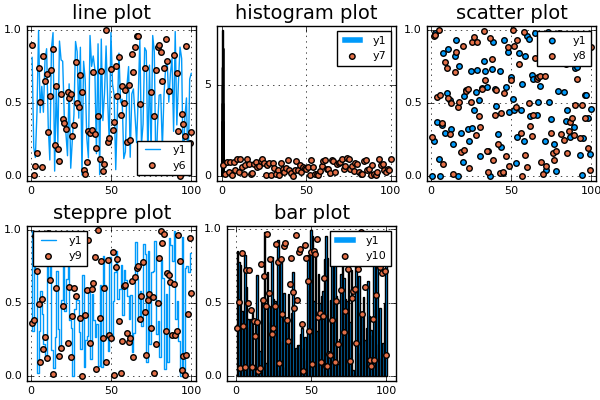

In [12]:
# ... and we can also add to the subplots in the same way
plot!(rand(100,5),t=:scatter)

In [13]:
# 3D plots
plotlyjs()
n = 100
ts = linspace(0,8π,n)
x = ts .* map(cos,ts)
y = (0.1ts) .* map(sin,ts)
z = 1:n
plot(x,y,z,zcolor=reverse(z),m=(10,0.8,:blues,stroke(0)),leg=false,cbar=true,w=5)
plot!(zeros(n),zeros(n),1:n,w=10)

In [18]:
# dataframes
using RDatasets, StatPlots, Plots
iris = dataset("datasets","iris")

INFO: Recompiling stale cache file /Users/florian.oswald/.julia/lib/v0.5/LineSearches.ji for module LineSearches.
INFO: Recompiling stale cache file /Users/florian.oswald/.julia/lib/v0.5/KernelDensity.ji for module KernelDensity.


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


## Animations

Any plot can be animated: see [https://juliaplots.github.io](https://juliaplots.github.io)

## Recipes

Recipes are abstract instructions for how to "build a plot" from data. There are multiple kinds of recipes. In execution order:

- User Recipes: Provides dispatches to plotting
- Type Recipes: Says how to interpret the data of an abstract type
- Plot Recipes: A pre-processing recipe which builds a set of series plots and defaults
- Series Recipes: What most would think of as a "type of plot", i.e. scatter, histogram, etc.

Since these extend Plots.jl itself, all of Plots.jl is accessible from the plotting commands that these make, and these recipes are accessible from each other.

[Series recipes are used to extend the compatibility of backends itself!]

[Check out of the Plots Ecosystem!](https://juliaplots.github.io/ecosystem/)

## Type Recipe Example

In [19]:
using DifferentialEquations
sol = solve(prob_ode_linear)
@show typeof(sol)
plot(sol,title="The Attributes Still Work")

LoadError: ArgumentError: Module DifferentialEquations not found in current path.
Run `Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.

## Plot and Type Recipes Together

StatsPlots provides a type recipe for how to read DataFrames, and a series recipe `marginalhist` which puts together histograms into a cohesive larger plot


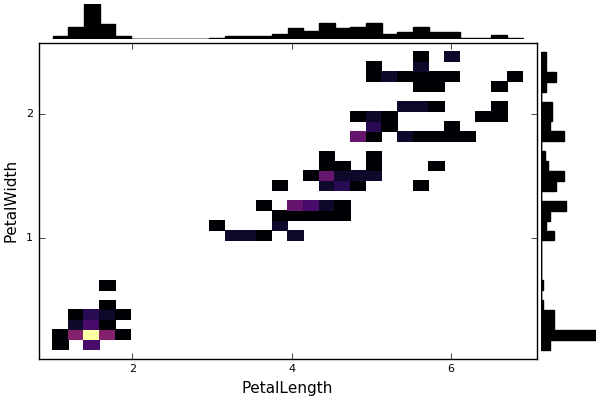

In [1]:
using RDatasets, StatPlots, Plots
iris = dataset("datasets","iris")
marginalhist(iris, :PetalLength, :PetalWidth)


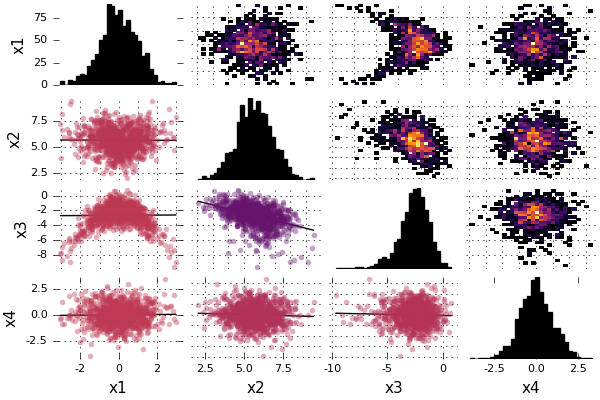

In [2]:
M = randn(1000,4)
M[:,2] += 0.8sqrt(abs(M[:,1])) - 0.5M[:,3] + 5
M[:,3] -= 0.7M[:,1].^2 + 2
corrplot(M, label = ["x$i" for i=1:4])

In [ ]:
import RDatasets
pyplot()
singers = RDatasets.dataset("lattice","singer")
violin(singers,:VoicePart,:Height,marker=(0.2,:blue,stroke(0)))
boxplot!(singers,:VoicePart,:Height,marker=(0.3,:orange,stroke(2)))

## Series Type

A series type allows you to define an entirely new way of visualizing data into backends.

In [ ]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [ ]:
gr()
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)